Nom 1: Adrià Vilariño

Nom 2: Eric Escrich

# Repte 5: Gat o gos?

<table>
<td>


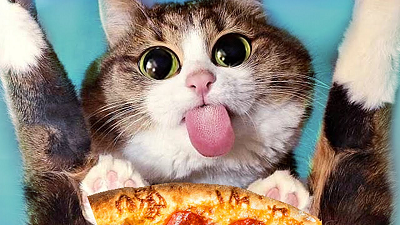



</td>
<td>


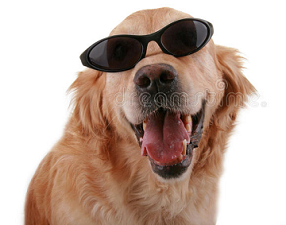



</td>
</table>

## Enunciat

En aquest repte crearem una **Xarxa Neuronal Convolucional** capaç de dir si una imatge correspon a la d'un gat o a la d'un gos.
Per poder fer això disposem d'un dataset format per 2000 fotos de gats i 2000 fotos de gossos. Aquest dataset es troba en [aquesta url](https://drive.google.com/file/d/1akESKTtn26-jiZGwMF1sVlDOMn8uQACu/view?usp=sharing).

### Pregunta 1
De quin tipus de problema es tracta?

Aquest tipus de problema és un problema de classificació binària.

In [1]:
import gdown
import zipfile
import os
import pandas as pd

def descargar_desde_google_drive(url, archivo_destino):
    """
    Descarga un archivo de Google Drive usando gdown.

    :param url: URL del archivo en Google Drive.
    :param archivo_destino: Ruta donde se guardará el archivo descargado.
    """
    print("Descargando archivo desde Google Drive...")
    gdown.download(url, archivo_destino, quiet=False)
    print(f"Archivo descargado: {archivo_destino}")

def descomprimir_y_cargar(archivo_zip, ruta_extraccion):
    """
    Descomprime un archivo ZIP y carga los CSV en DataFrames.
    """
    print("Descomprimiendo archivo...")
    try:
        with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
            zip_ref.extractall(ruta_extraccion)
        print(f"Archivos extraídos en: {ruta_extraccion}")
    except zipfile.BadZipFile:
        raise Exception("El archivo descargado no es un archivo ZIP válido.")

    # Cargar los archivos CSV extraídos
    dataframes = []
    for root, _, files in os.walk(ruta_extraccion):
        for file in files:
            if file.endswith('.csv'):
                ruta_archivo = os.path.join(root, file)
                print(f"Cargando datos desde: {ruta_archivo}")
                df = pd.read_csv(ruta_archivo)
                dataframes.append(df)

    return dataframes

# Ejemplo de uso
if __name__ == "__main__":
    URL = "https://drive.google.com/uc?id=1akESKTtn26-jiZGwMF1sVlDOMn8uQACu"
    ARCHIVO_DESTINO = "datos.zip"
    RUTA_EXTRACCION = "./datos_extraidos"

    os.makedirs(RUTA_EXTRACCION, exist_ok=True)

    try:
        # Descargar el archivo
        descargar_desde_google_drive(URL, ARCHIVO_DESTINO)

        # Descomprimir y cargar datos
        dataframes = descomprimir_y_cargar(ARCHIVO_DESTINO, RUTA_EXTRACCION)

        # Mostrar los DataFrames
        for i, df in enumerate(dataframes):
            print(f"DataFrame {i + 1}:")
            print(df.head())
    except Exception as e:
        print(f"Error: {e}")



Descargando archivo desde Google Drive...


Downloading...
From (original): https://drive.google.com/uc?id=1akESKTtn26-jiZGwMF1sVlDOMn8uQACu
From (redirected): https://drive.google.com/uc?id=1akESKTtn26-jiZGwMF1sVlDOMn8uQACu&confirm=t&uuid=b670e7ce-3d53-4574-b71a-f0c293578a62
To: /content/datos.zip
100%|██████████| 91.0M/91.0M [00:00<00:00, 145MB/s]


Archivo descargado: datos.zip
Descomprimiendo archivo...
Archivos extraídos en: ./datos_extraidos


In [2]:
# Defineix les variables train_dir, validation_dir, test_dir amb el path de
# cada un dels directoris que contenen les imatges corresponents
train_dir = './datos_extraidos/cats_and_dogs_small/train'
validation_dir = './datos_extraidos/cats_and_dogs_small/validation'
test_dir = './datos_extraidos/cats_and_dogs_small/test'


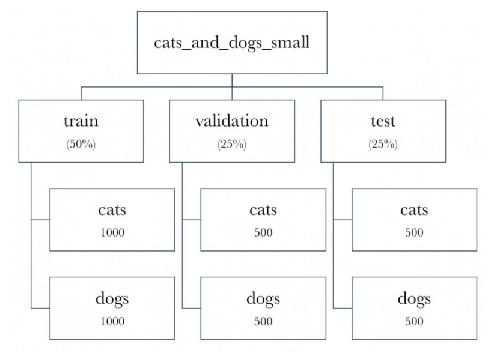

In [3]:
# Mostra les imatges de 16 gats i 16 gossos en matrius de 4x4

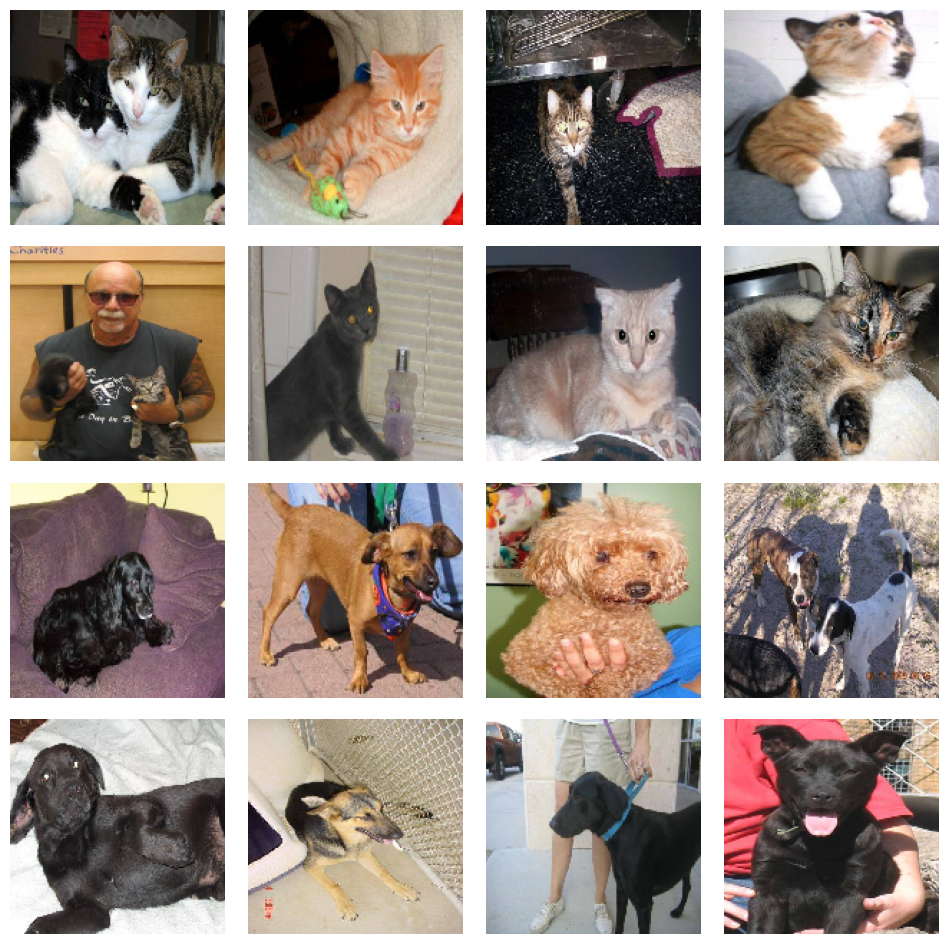

In [4]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np

# Directoris dels gats i gossos
cats_dir = './datos_extraidos/cats_and_dogs_small/train/cats'
dogs_dir = './datos_extraidos/cats_and_dogs_small/train/dogs'

# Obtenir les imatges dels gats i gossos
cats_images = os.listdir(cats_dir)
dogs_images = os.listdir(dogs_dir)

# Seleccionar aleatòriament 16 imatges de gats i 16 de gossos
random_cats = random.sample(cats_images, 16)
random_dogs = random.sample(dogs_images, 16)

# Crear una figura amb matriu de 4x4
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Mostrar les imatges de gats i gossos en la matriu 4x4
for i, ax in enumerate(axes.flat):
    if i < 16:
        if i < 8:  # Les primeres 8 imatges seran gats
            img_path = os.path.join(cats_dir, random_cats[i])
        else:  # Les següents 8 imatges seran gossos
            img_path = os.path.join(dogs_dir, random_dogs[i-8])

        # Carregar i mostrar la imatge
        img = image.load_img(img_path, target_size=(150, 150))  # Redimensionar imatges
        img_array = image.img_to_array(img) / 255.0  # Convertir a array i normalitzar
        ax.imshow(img_array)
        ax.axis('off')  # Desactivar l'eix

# Ajustar l'espai entre subgràfics
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


### Pregunta 2
Quàntes neurones tindrem a la capa de sortida?


**1 neurona per a classificació binària, amb activació sigmoid.**
*   Si el valor és més a prop de 0, l'entrada serà classificada com a "gat".
*   Si el valor és més a prop de 1, l'entrada serà classificada com a "gos".





In [5]:
# Degut a la complexitat del problema i a la mida de les imatges necessitarem una xarxa amb més capes. Això ens
# serveix per augmentar la capacitat del model i per reduïr encara més la mida del mapa de característiques abans
# d'arribar a la capa final.
#
# Crea una xarxa neuronal amb 4 capes convolucionals + MaxPooling de 32, 64, 128 i 128 filtres respectivament i
# de mida 3x3 (Conv) i 2x2 (MaxP). Abans de la capa de sortida tindrem una capa densa de 512 neurones. L'entrada
# al nostre model serà de 150x150x3, farem servir imatges a color de 150x150 pixels i cada pixel necessita 3 números
# per poder codificar la profunditat de color en RGB.
#
# Observa amb el mètode summary com els mapes de característiques van reduïnt la seva mida a mesura que avancen
# al llarg de les capes de la xarxa neuronal.


In [29]:
from tensorflow.keras.models import Sequential, Mode
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Resizing

# Creación del modelo
model = Sequential()

# Redimensionamiento automático
model.add(Resizing(150, 150, interpolation="bilinear", input_shape=(None, None, 3)))

# Primera capa convolucional + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tercera capa convolucional + MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Cuarta capa convolucional + MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplanar las características para pasar a la capa densa
model.add(Flatten())

# Capa densa
model.add(Dense(512, activation='relu'))

# Capa de salida para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compil·la el model amb un optimitzador RMSprop amb un learning rate de 0,0001

from tensorflow.keras.optimizers import RMSprop

# Creació de l'optimitzador RMSprop amb un learning rate de 0.0001
optimizer = RMSprop(learning_rate=0.0001)

# Compilació del model amb l'optimitzador especificat
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Resum del model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# El dataset són imatges de diferents mides i amb pixels RGB compresos entre 0 i 255. Per poder
# realitzar l'entrenament necessitem imatges de 150x150 pixels i amb els valors RGB normalitzats
# entre 0 i 1.
#
# Pots realitzar aquesta operació fent servir ImageDataGenerator i aprofitar la jerarquia de directoris
# per definir la classe de cada una de les imatges.
#
# Exemple:
#
# train_datagen = ImageDataGenerator( rescale = 1.0/255. )
# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     batch_size=20,
#                                                     class_mode='binary',
#                                                     target_size=(150, 150))
#


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crea un generador para las imágenes de entrenamiento, validación y test
# Configura el repartiment: 50% train, 25% validation, 25% test
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    seed=42
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    seed=42
)

# Comprova els percentatges
num_train_images = train_generator.n
num_validation_images = validation_generator.n
num_test_images = test_generator.n
total_images = num_train_images + num_validation_images + num_test_images

train_percentage = (num_train_images / total_images) * 100
validation_percentage = (num_validation_images / total_images) * 100
test_percentage = (num_test_images / total_images) * 100

# Mostra els resultats
print(f"Imatges d'entrenament: {num_train_images} ({train_percentage:.2f}%)")
print(f"Imatges de validació: {num_validation_images} ({validation_percentage:.2f}%)")
print(f"Imatges de test: {num_test_images} ({test_percentage:.2f}%)")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Imatges d'entrenament: 2000 (50.00%)
Imatges de validació: 1000 (25.00%)
Imatges de test: 1000 (25.00%)


In [10]:
# Realitza l'entrenament del model incolent les dades de validació, amb 50 epochs i iguala la sortida
# a la variable "history"


# Entrenament del model amb les dades d'entrenament i validació
history = model.fit(
    train_generator,  # Generador d'entrenament
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Passos per cada epoch
    epochs=50,  # Nombre d'epochs
    validation_data=validation_generator,  # Generador de validació
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Passos de validació
    verbose=1  # Mostrar el procés d'entrenament
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.5154 - loss: 0.6980 - val_accuracy: 0.5554 - val_loss: 0.6871
Epoch 2/50
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5312 - loss: 0.6904

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5312 - loss: 0.6904 - val_accuracy: 0.8750 - val_loss: 0.6636
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.5512 - loss: 0.6861 - val_accuracy: 0.5464 - val_loss: 0.6730
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6562 - loss: 0.6291 - val_accuracy: 0.3750 - val_loss: 0.7599
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5965 - loss: 0.6622 - val_accuracy: 0.6099 - val_loss: 0.6553
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.8438 - loss: 0.5887 - val_accuracy: 0.6250 - val_loss: 0.6271
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.6222 - loss: 0.6404 - val_accuracy: 0.6290 - val_loss: 0.6429
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5938 - loss: 0.6639 - val_accuracy: 0.5000 - val_loss: 0.6145
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.6536 - loss: 0.6218 - val_accuracy: 0.6623 - val_loss: 

### Pregunta 3
Quina és la precisió amb les dades d'entrenament? I amb les dades de validació?

Una diferència gran entre aquestes dues precisions ens podria estar indicant que s'ha produït sobreentrenament (overfitting).

Resultats de precisió:

*   Precisió en les dades d'entrenament: La precisió final del conjunt d'entrenament al final de l'entrenament és de 81.25%.
*   Precisió en les dades de validació: La precisió final del conjunt de validació al final de l'entrenament és de 62.50%.



Anàlisi de sobreentrenament:

*   La diferència entre la precisió de les dades d'entrenament (81.25%) i la precisió de les dades de validació (62.50%) podria ser un indici de sobreentrenament (overfitting). A mesura que el model continua entrenant-se, sembla que està aprenent a memoritzar les dades d'entrenament però no generalitza bé a les dades de validació. Això es fa evident perquè, mentre la precisió d'entrenament millora, la precisió de validació es manté constant o no millora tan significativament.




In [11]:
# Fent servir la variable history, mostra un gràfic amb l'evolució de precisió i l'error
# de les dades d'entrenament i les dades de validació


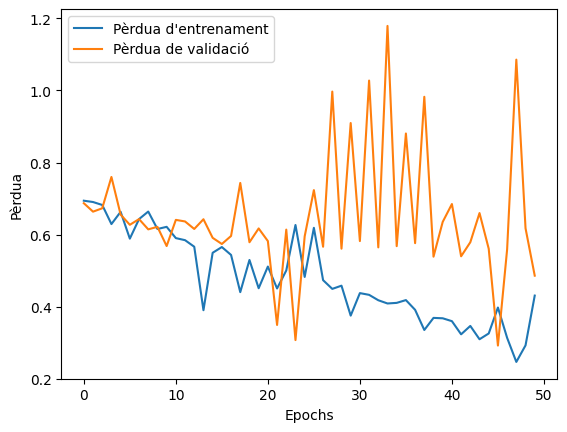

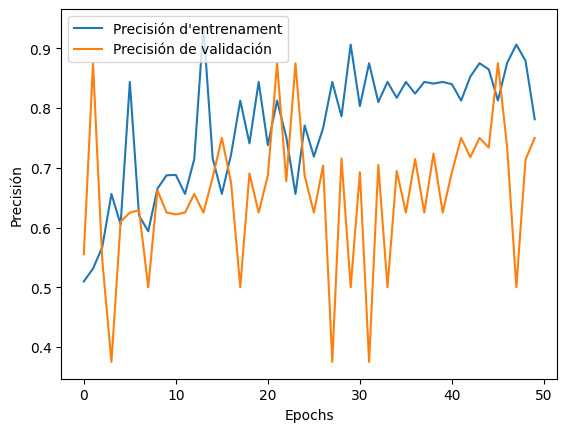

In [12]:
import matplotlib.pyplot as plt

# Gràfic de la pèrdua
plt.plot(history.history['loss'], label='Pèrdua d\'entrenament')
plt.plot(history.history['val_loss'], label='Pèrdua de validació')
plt.xlabel('Epochs')
plt.ylabel('Pèrdua')
plt.legend()
plt.show()

# Gràfic de la precisió
plt.plot(history.history['accuracy'], label='Precisión d\'entrenament')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.show()


A les gràfiques podem veure com les linies de la precisió de les dades d'entrenament i de validació es separen aproximadament a partir de l'epoch 5. A la gràfica de l'error, podem observar que mentre amb les dades d'entrenament l'error continua baixant, amb les dades de validació l'error s'estanca.

Això ens està indicant que a partir de aquest moment comença l'overfitting i el model ja no està millorant. És entrenament inútil.

La xarxa treballa bé amb les imatges amb les que ha estat entrenada però el seu rendiment baixa quan ha de fer prediccions amb imatges que no ha vist mai.

Si el resultat és satisfactori podriem aturar l'entrenement en aquest punt i quedar-nos amb el model obtingut. En cas contrari, hauríem de millorar el model o millorar el dataset.

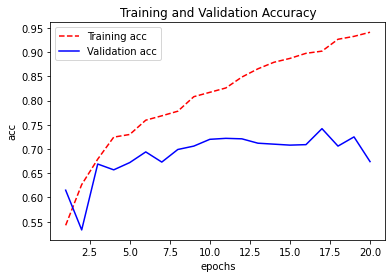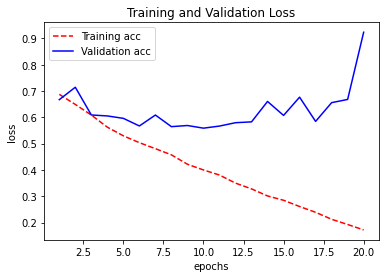

In [13]:
# Crea una miniapp amb un botó que ens permeti escollir una imatge del nostre ordinador,
# mostri aquesta imatge després d'adaptarla i comprobi si es tracta d'un gat o d'un gos.
#
# Després prova amb diferents imatges de gats i gossos obtingudes d'internet o de fotos
# realitzades a la vida real. Si tens mascota és una bona oportunitat per fer proves.


In [14]:
import tensorflow as tf
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Función para procesar y clasificar la imagen
def classify_image(change):
    # Accede a la imagen cargada
    uploaded_file = list(upload_button.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file['content']))

    # Redimensiona la imagen al tamaño que requiere el modelo (150x150 en este caso)
    image = image.resize((150, 150))

    # Convierte la imagen en un array de numpy y normaliza los valores
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)  # Añadir dimensión de batch

    # Realiza la predicción
    predictions = model.predict(image_array)
    prediction_value = predictions[0][0]

    # Interpreta la predicción
    if prediction_value > 0.5:
        label = f"Gos: (probabilidad: {prediction_value:.2f})"
    else:
        label = f"Gat: (probabilidad: {1 - prediction_value:.2f})"

    # Muestra la imagen y la predicción
    display(widgets.Image(value=uploaded_file['content']))
    print(f"Predicción: {label}")

# Crea un botón para cargar la imagen
upload_button = widgets.FileUpload(accept="image/*", multiple=False)
display(upload_button)

# Ejecuta la función cuando se selecciona una imagen
upload_button.observe(classify_image, names='value')



FileUpload(value={}, accept='image/*', description='Upload')

# Repte 5v1: Gat o gos amb *Data Augmentation*

Com menys dades d'entrenament tinguem disponibles, menys possibilitats tindrem d'obtenir prediccions precises. Ara crearem un nou model fent servir tècniques de **Data Augmentation**. Aquest mètode ens permet generar més imatges a partir de les imatges disponibles fent transformacions aleatòries que ens generin imatges noves.

Aquestes transformacions poden ser operacions com rotar, invertir, voltear, zoom, etc. Ho farem amb la funció **[ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)** del paquet de preprocessat d'imatges de **Keras**.

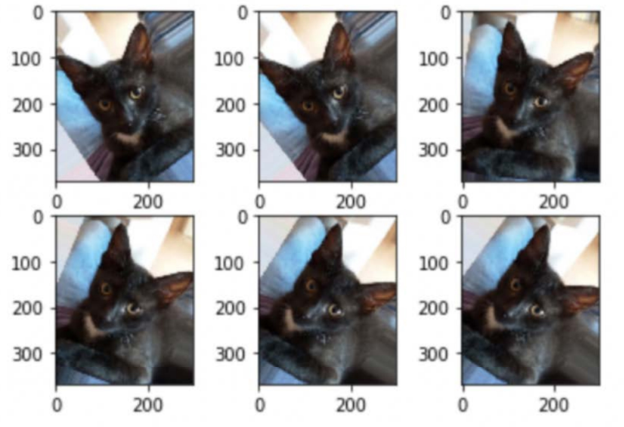

In [27]:
# Exemple d'ús
#
# En aquest cas no tindria sentit invertir verticalment la imatge perquè tindriem
# gats i gossos de cap per avall

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1./255,                     # Normalització dels pixels
    rotation_range = 40,                  # Rotació aleatòria fins a aquest angle
    width_shift_range = 0.2,              # Traslació aleatòria fins al 20% de l'amplada
    height_shift_range = 0.2,             # Traslació aleatòria fins al 20% de l'alçada
    shear_range = 0.2,                     # Transformació aleatòria de tall
    zoom_range = 0.2,                     # Zoom aleatoria fins al 20%
    horizontal_flip = True,               # Efecte mirall horitzontal
    fill_mode = 'nearest'                 # Estrategia per omplir els pixels de nova creació
)

# Genera la variable train_generator
# Generació de dades d'entrenament
train_generator = train_datagen.flow_from_directory(
    './datos_extraidos/cats_and_dogs_small/train',    # Ruta al directori d'entrenament
    target_size=(150, 150),                           # Mida de les imatges
    batch_size=32,                                    # Mida del lot
    class_mode='binary'                               # Classificació binària
)

# Generació de dades de validació
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    './datos_extraidos/cats_and_dogs_small/validation',                   # Ruta al directori de validació
    target_size=(150, 150),           # Mida de les imatges
    batch_size=32,                    # Mida del lot
    class_mode='binary'               # Classificació binària
)

# Generació de dades de test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './datos_extraidos/cats_and_dogs_small/test',                    # Ruta al directori de test
    target_size=(150, 150),           # Mida de les imatges
    batch_size=32,                    # Mida del lot
    class_mode='binary'               # Classificació binària
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
# Crea un nou model amb la mateixa estructura que en el cas anterior i
# realitza l'entrenament de 100 epochs amb les noves dades


# Comprovació dels lots generats
for data_batch, labels_batch in train_generator:
    print(f"Shape de les dades: {data_batch.shape}, Shape de les etiquetes: {labels_batch.shape}")
    break


# Creació del model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilació del model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenament del model
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size
history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

Shape de les dades: (32, 150, 150, 3), Shape de les etiquetes: (32,)
Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - accuracy: 0.5119 - loss: 0.7359 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4688 - loss: 0.7030 - val_accuracy: 0.5000 - val_loss: 0.6992
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 221ms/step - accuracy: 0.5328 - loss: 0.6895 - val_accuracy: 0.5927 - val_loss: 0.6858
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.5625 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.6862
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.5746 - loss: 0.6836 - val_accuracy: 0.6341 - val_loss: 0.6612
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.5625 - loss: 0.6810 - val_accuracy: 0.5000 - val_loss: 0.6974
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 222ms/step - accuracy: 0.5824 - loss: 0.6713 - val_accuracy: 0.6008 - val_loss: 0.6673
Epoch 8/100
62/62 ━━━━━━━━

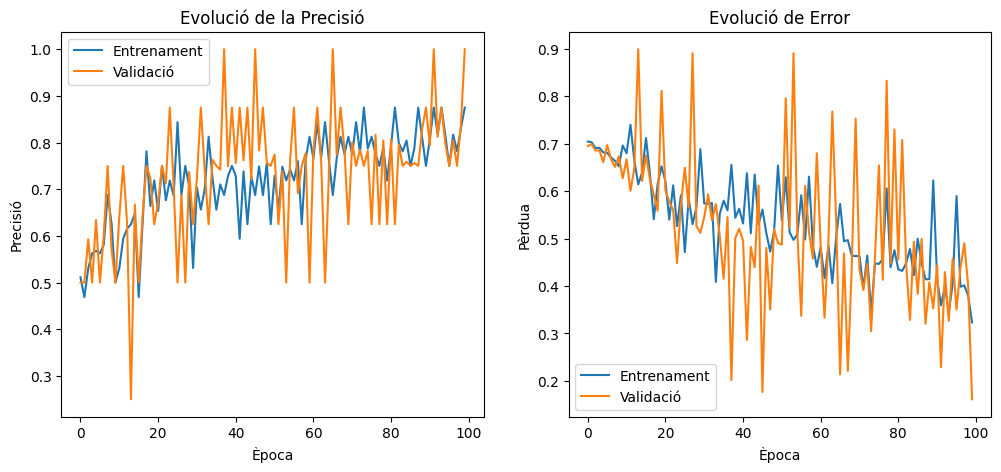

In [24]:
# Mostra el gràfic amb l'evolució de la precisió i l'error de les dades
# d'entrenament i les dades de validació
import matplotlib.pyplot as plt

# Funció per mostrar els gràfics d'entrenament
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Evolució de la precisió
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenament')
    plt.plot(history.history['val_accuracy'], label='Validació')
    plt.title('Evolució de la Precisió')
    plt.xlabel('Època')
    plt.ylabel('Precisió')
    plt.legend()

    # Evolució de l'error
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenament')
    plt.plot(history.history['val_loss'], label='Validació')
    plt.title('Evolució de Error')
    plt.xlabel('Època')
    plt.ylabel('Pèrdua')
    plt.legend()

    plt.show()

# Mostra dels gràfics
plot_training_history(history)



### Pregunta 4
A partir de quin epoch es produeix el sobreentrenament?


 El sobreentrenament podria començar al voltant de la 30a època, on la precisió de validació comença a variar dràsticament i ja no segueix la tendència de la precisió d'entrenament.

In [ ]:
# Fes l'avaluació del model amb les dades de test
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Pèrdua en el test: {test_loss:.4f}")
print(f"Precisió en el test: {test_accuracy:.4f}")


#Repte 5v2: Gat o gos amb *Feature Extraction*

En aquesta versió del model farem servir la tècnica **Transfer Learning** per millorar encara més la precisió del nostre model, en concret l'estratègia **Feature Extraction**. Aprofitarem una xarxa preentrenada anomenada **VGG16** que tenim disponible als paquets de Keras. Aquesta és una CNN entrenada amb 1 milió d'imatges classificades en 1000 classes diferents.

In [30]:
from tensorflow.keras.applications import VGG16

# Creem un model a partir de VGG16
pre_trained_model = VGG16(input_shape = (150,150,3),
                          include_top = False,
                          weights = 'imagenet'
                          )

# Mostra un resum de l'estructura de la CNN preentrenada

# Congelem les capes per a que no es modifiquin el pesos durant l'entrenament
for layer in pre_trained_model.layers:
  layer.trainable = False

# Podem crear el modelFE com si la CNN preentrenada fos una capa més. Afegirem
# una capa Flatten i una Dense de 256 neurones abans de la capa de sortida
modelFE = Sequential()
modelFE.add(pre_trained_model)


### Pregunta 5
Per què una part dels paràmetres són no entrenables? A quina part del model corresponen?

In [ ]:
# Realitza l'entrenament del nou model amb 100 epochs i learning_rate de 0.0001


In [ ]:
# Mostra el gràfic amb l'evolució de la precisió i l'error de les dades
# d'entrenament i les dades de validació


### Pregunta 6
A partir de quin epoch es produeix el sobreentrenament?

In [ ]:
# Fes l'avaluació del model amb les dades de test


#Repte 5v3: Gat o gos amb *Fine-Tuning*

In [ ]:
# Crea un nou model a partir del model pre-entrenat VGG16 i entrena'l amb la
# tècnica Fine-Tuning. Has de introduir el valor True el paràmetre layer.trainable
# de totes les capes 'block5'. Pots fer servir layer.name. En total hauries de tenir
# al voltant de 9M de paràmetres entrenables

In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
# Carreguem el model pre-entrenat VGG16 sense la part superior
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Activem les capes del bloc 5 per entrenar-les
for layer in base_model.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

# Afegim les capes superiors personalitzades
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Definim el model complet
model = Model(inputs=base_model.input, outputs=outputs)

# Compilació del model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [32]:
# Entrena el model durant 100 epochs
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size
history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 364ms/step - accuracy: 0.6476 - loss: 0.6013 - val_accuracy: 0.8861 - val_loss: 0.2672
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8750 - loss: 0.3553 - val_accuracy: 0.7500 - val_loss: 0.3805
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - accuracy: 0.8497 - loss: 0.3301 - val_accuracy: 0.9083 - val_loss: 0.2026
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8125 - loss: 0.4257 - val_accuracy: 1.0000 - val_loss: 0.0956
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 263ms/step - accuracy: 0.9000 - loss: 0.2272 - val_accuracy: 0.9244 - val_loss: 0.1841
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.9688 - loss: 0.1575 - val_accuracy: 1.0000 - val_loss: 0.0550
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - accuracy: 0.8961 - loss: 0.2549 - val_accuracy: 0.9315 - val_loss: 0.1606
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.9375 - loss: 0.1310 - val_a

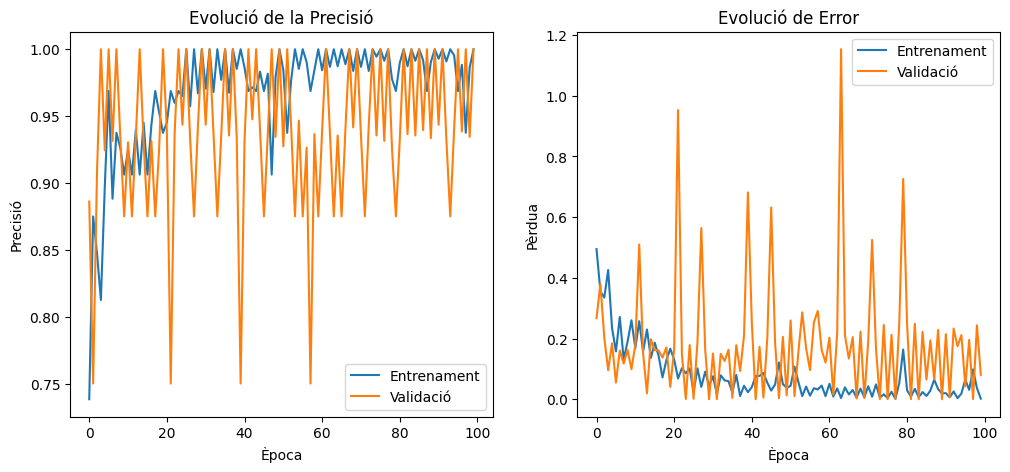

In [33]:
# Mostra el gràfic amb l'evolució de la precisió i l'error de les dades
# d'entrenament i les dades de validació
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Evolució de la precisió
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenament')
    plt.plot(history.history['val_accuracy'], label='Validació')
    plt.title('Evolució de la Precisió')
    plt.xlabel('Època')
    plt.ylabel('Precisió')
    plt.legend()

    # Evolució de l'error
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenament')
    plt.plot(history.history['val_loss'], label='Validació')
    plt.title('Evolució de Error')
    plt.xlabel('Època')
    plt.ylabel('Pèrdua')
    plt.legend()

    plt.show()

# Mostra dels gràfics
plot_training_history(history)

In [ ]:
# Fes l'avaluació del model amb les dades de test
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Pèrdua en el test: {test_loss:.4f}")
print(f"Precisió en el test: {test_accuracy:.4f}")


### Pregunta 7
Quina ha estat la precisió amb cada un dels models?


*   CNN:
*   amb Data Augmentation: 87
*   amb Feature Extraction:
*   amb Fine-Tuning:



# Com guardem els models creats?

Com hauràs pogut comprovar, els models que estem creant són cada cop més complexes i triguen més en realitzar l'entrenament. És per això que en certes situacions ens interesarà guardar el model per recuperar-lo en un altre moment.

In [ ]:
# Guarda en un fitxer el model que millor ha realitzat les prediccions fent servir
# la funció save(). Aquesta funció fa servir el format hdf5.

# Crea un model nou amb un altre nom i carrega la configuració del model guardat
# al fitxer fent servir la funció load_model()


In [ ]:
# Crea una miniapp com l'anterior però amb el model final que acabes de recuperar
